<a href="https://colab.research.google.com/github/ibrahimkhaliloglu/BigMartSales/blob/main/BigMartSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Get Data

In [72]:
train = pd.read_csv('../content/Train.csv')
test = pd.read_csv('../content/Test.csv')

In [73]:
train.shape, test.shape

((8523, 12), (5681, 11))

We have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns.

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [75]:
# checking for missing values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values

Mean --> average

Mode --> more repeated value

In [76]:
# mean value of "Item_Weight" column
train['Item_Weight'].mean()

12.857645184136183

In [77]:
# filling the missing values in "Item_weight column" with "Mean" value
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)

In [78]:
# mode of "Outlet_Size" column
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [79]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [80]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [81]:
miss_values = train['Outlet_Size'].isnull()   

In [82]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [83]:
train.loc[miss_values, 'Outlet_Size'] = train.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [84]:
# checking for missing values
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

DATA ANALYSIS

In [85]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical features

In [86]:
sns.set()

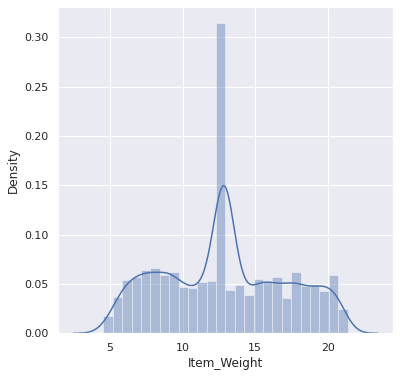

In [87]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Weight'])
plt.show()

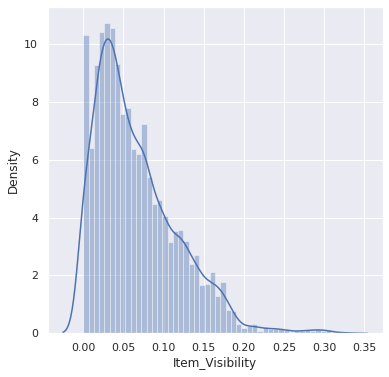

In [88]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Visibility'])
plt.show()

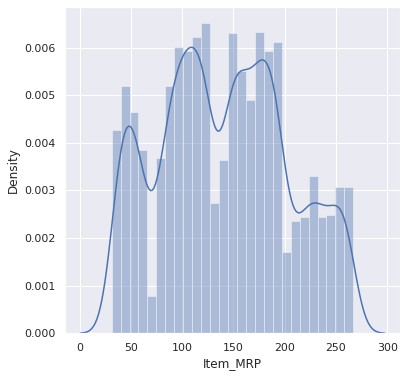

In [89]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(train['Item_MRP'])
plt.show()

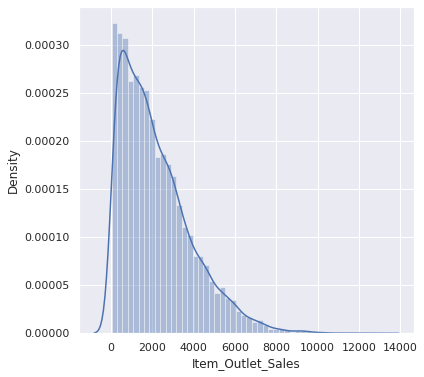

In [90]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Outlet_Sales'])
plt.show()

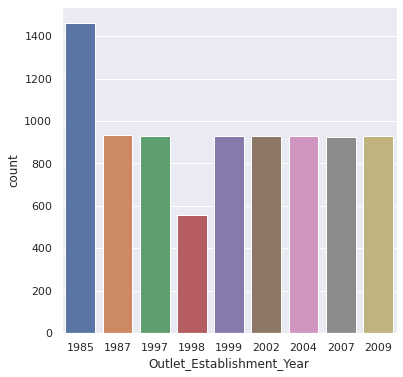

In [91]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=train)
plt.show()

Categorical Features

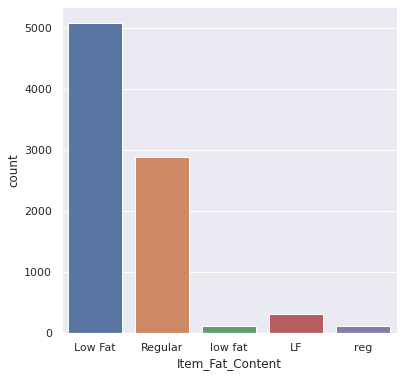

In [92]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=train)
plt.show()

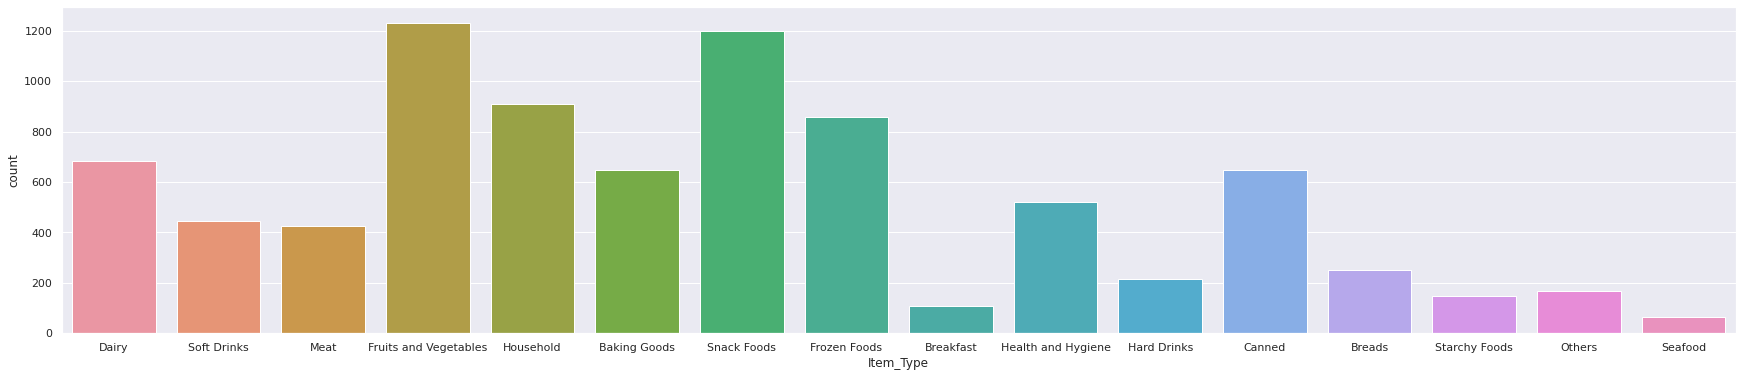

In [93]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=train)
plt.show()

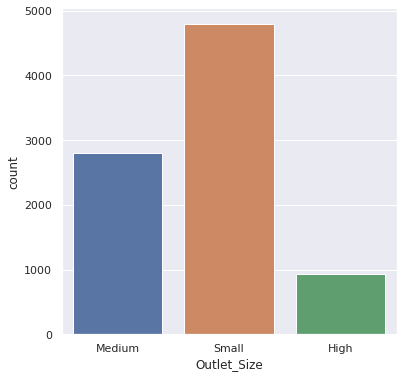

In [94]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=train)
plt.show()

# Exploratory Data Analysis

In [95]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [96]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [97]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

We see there are some irregularities in the column and it is needed to fix them.

In [98]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat', 'Low Fat', 'Regular'], inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace = True)

In [99]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].astype(str)

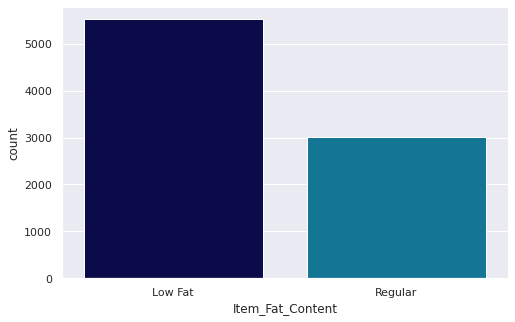

In [100]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content', data=train, palette='ocean')

The Items bought are more of Low Fat.

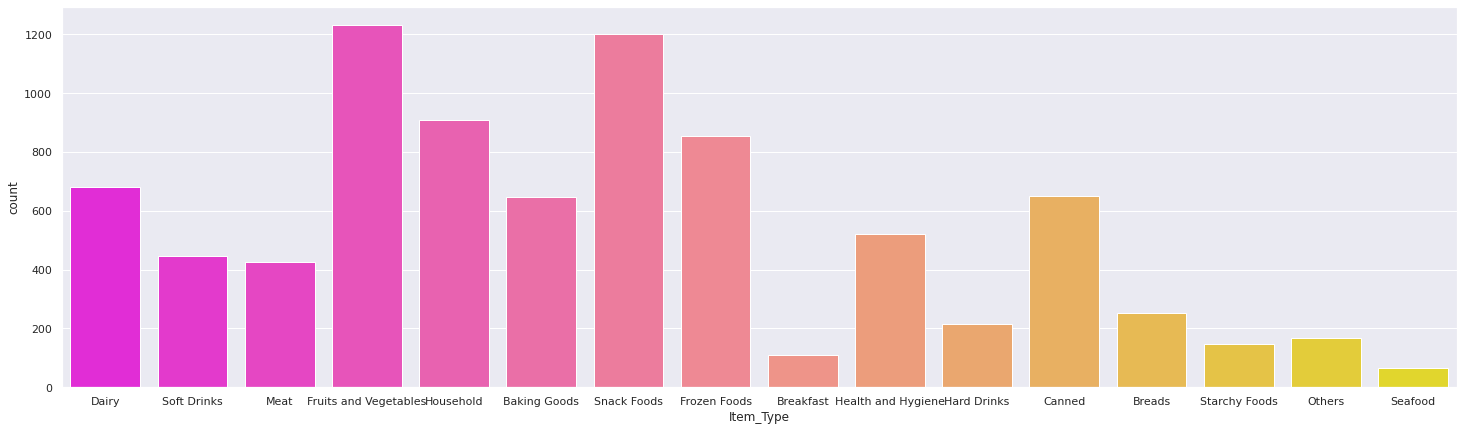

In [101]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type', data=train, palette='spring')

* Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
* Snack Foods too have good sales.

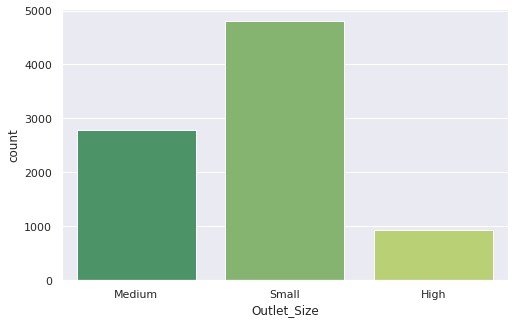

In [102]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size', data=train, palette='summer')

The Outlets are more of Medium Size

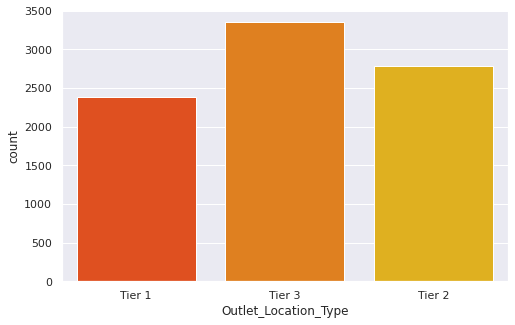

In [103]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type', data=train, palette='autumn')

The Outlets are maximum in number in Tier 3 Cities

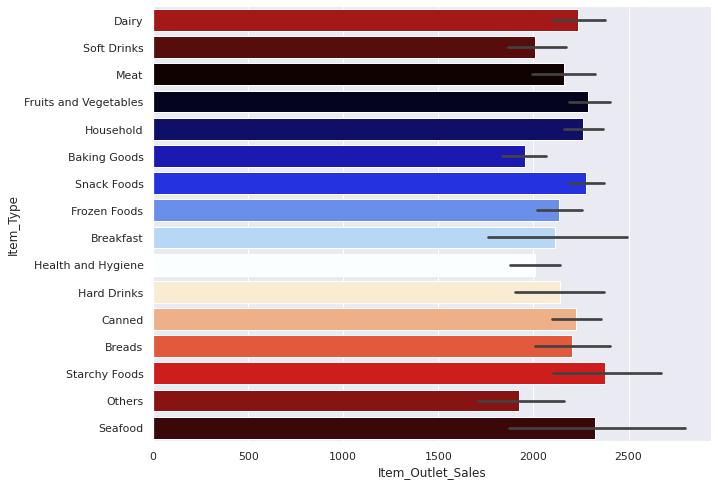

In [104]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type', x='Item_Outlet_Sales', data=train, palette= 'flag')

The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

# Building a Model

In [105]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [106]:
le = LabelEncoder()
var_mode = train.select_dtypes(include ='object').columns

for i in var_mode:
    train[i] = le.fit_transform(train[i])
    
for i in var_mode:
    test[i] = le.fit_transform(test[i])

In [107]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [108]:
X = train.drop(columns = ['Item_Outlet_Sales'], axis=1)
y = train['Item_Outlet_Sales']

In [109]:
X_train,X_valid,y_train,y_valid = train_test_split(X, y, test_size=0.2, random_state=22)

In [110]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [111]:
algos = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), KNeighborsRegressor()]
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'K Neighbors Regression', 'Decision Tree Regression']
rmse_list = []

In [112]:
for name in algos:
    model = name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    MSE = metrics.mean_squared_error(y_valid, y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)  

In [113]:
evaluation = pd.DataFrame({'Model': names, 'RMSE': rmse_list})

In [114]:
evaluation

,Model,RMSE
0,Linear Regression,1251.792103
1,Ridge Regression,1251.640797
2,Lasso Regression,1251.306104
3,K Neighbors Regression,1591.233719
4,Decision Tree Regression,1569.047024


As we can clearly see Lasso performs slighlty better than Ridge and Linear regression. KNN Regressor and Decision Tree Regressor do not improve the score.